In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1. Color에 대한 이해
[color api](https://matplotlib.org/stable/api/colors_api.html)
#### 1.0. HSL

- **Hue(색조)** : 빨강, 파랑, 초록 등 색상으로 생각하는 부분
    - 빨강에서 보라색까지 있는 스펙트럼에서 0-360으로 표현
- **Saturate(채도)** : 무채색과의 차이 
    - 선명도라고 볼 수 있음 (선명하다와 탁하다.)
- **Lightness(광도)** : 색상의 밝기

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/HSL_color_solid_sphere_spherical.png" width=250>

#### 1.1. 색이 중요한 이유 
위치와 **색**은 가장 효과적인 채널 구분!

#### 1.2 화려함이 시각화의 전부는 아니다
가장 중요한 것은 독자에게 원하는 인사이트를 전달!

#### 1.3. 색이 가지는 의미
카카오가 초록색, 네이버가 노란색이라면?
* 기본 정보와 느낌을 잘 활용하는 것이 중요하다.

## 2. Color Palette의 종류

#### 2.1. 범주형

Discrete, Qualitative 등 다양한 이름으로 불린다.
* 독립된 색상으로 구성되어 범주형 변수에 사용됨
* 최대 10개의 색상까지 사용
    * 그 외에는 기타로 묶자.
* **색의 차이**로 구분하는 것이 특징
    * 채도, 명도의 개별적 조정은 하지말자.


![](https://i.stack.imgur.com/EiMBO.png)

In [10]:
student = pd.read_csv('./StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Group to Number
groups = sorted(student['race/ethnicity'].unique())
gton = dict(zip(groups , range(5)))

# Group에 따라 색 1, 2, 3, 4, 5
student['color'] = student['race/ethnicity'].map(gton)

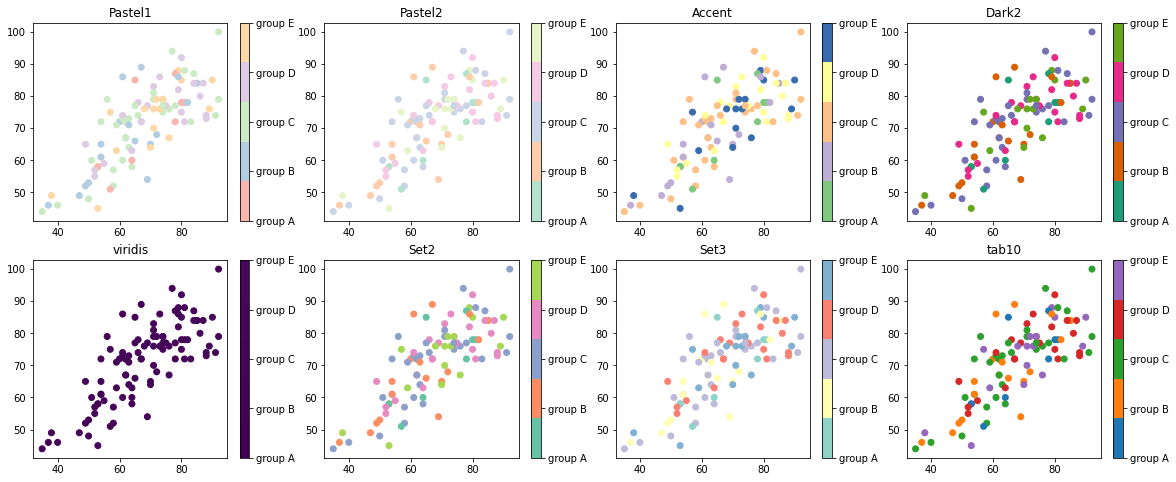

In [21]:
# ListedColormap : Colormap을 넣어주면 ListedColormap을 반환해준다.
from matplotlib.colors import ListedColormap

qualitative_cm_list = ['Pastel1', 'Pastel2', 'Accent', 'Dark2',
                       'viridis', 'Set2', 'Set3', 'tab10']
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

student_sub = student.sample(100)

for idx, cm in enumerate(qualitative_cm_list):
    pcm = axes[idx].scatter(student_sub['math score'],
                           student_sub['reading score'],
                            # cmap을 통해서 전달할때는 color가 아닌 c를 쓴다.
                           c = student_sub['color'], 
                            # 각 컬러맵에서 상위 5개만 뽑아 사용한다.
                           cmap=ListedColormap(plt.cm.get_cmap(cm).colors[:5])
                           )
    # figure에 colorbar 추가 colorbar또한 subplots에 속한다.
    cbar = fig.colorbar(pcm, ax=axes[idx], ticks=range(5))
    cbar.ax.set_yticklabels(groups)
    axes[idx].set_title(cm)

plt.show()

일반적으로 tab10, Set2가 많이 사용된다. 아래에 있는 R colormap도 이쁘니 많이 참고해보자.

- [Top R Color Palettes to Know for Great Data Visualization](https://www.datanovia.com/en/blog/top-r-color-palettes-to-know-for-great-data-visualization/)

#### 2.2. 연속형
정렬된 값을 가지는 순서형, 연속형 변수에 적합

* **연속적인 색상**을 사용하여 값을 표현
    * 어두운 배경에서는 밝은 색을 밝은 배경에서는 어두운 색이 큰 값을 표현
* 색상은 **단일 색조로 표현**하는 것이 좋고, 균일한 색상 변화가 중요하다.
- 지리지도 데이터, 계층형 데이터에도 적합
![](https://matplotlib.org/stable/_images/sphx_glr_colormaps_002_2_0x.png)

색조는 유지하지만 밝기를 조정하여 연속적인 표현을 한다.

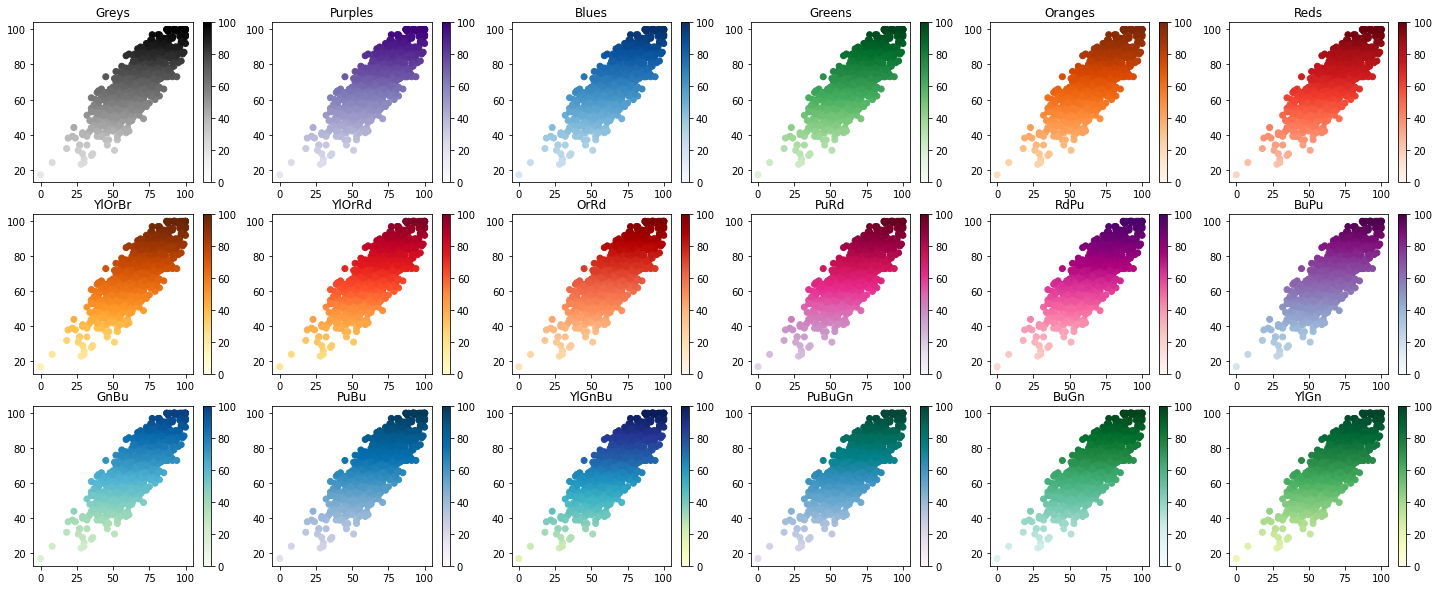

In [22]:
sequential_cm_list = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

fig, axes = plt.subplots(3, 6, figsize=(25, 10))
axes = axes.flatten()

student_sub = student.sample(100)

for idx, cm in enumerate(sequential_cm_list):    
    pcm = axes[idx].scatter(student['math score'], student['reading score'],
                            c=student['reading score'], 
                            cmap=cm,
                            # vmin 최소값 , vmax 최댓값 설정
                            vmin=0, vmax=100
                    
                     )
    fig.colorbar(pcm, ax=axes[idx])
    axes[idx].set_title(cm)
    
plt.show()

#### imshow
image 정보를 2d-array로 받아 색상을 표현한다.

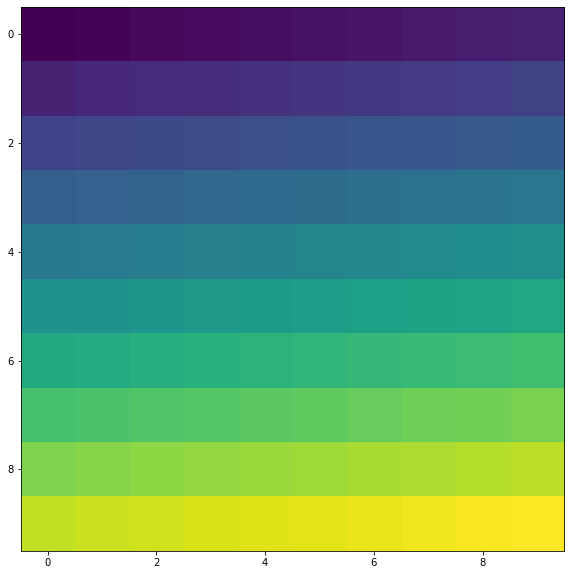

In [26]:
im = np.arange(100).reshape(10, 10)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im)
plt.show()

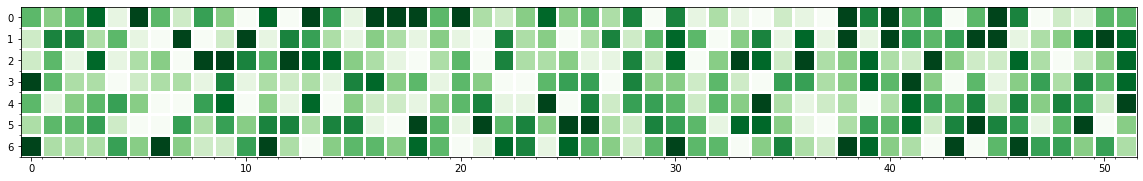

In [35]:
# 깃헙 잔디밭 만들기
im = np.random.randint(10, size=(7, 52))
fig, ax = plt.subplots(figsize=(20, 5))
ax.imshow(im, cmap='Greens')
ax.set_yticks(np.arange(7)+0.5, minor=True)
ax.set_xticks(np.arange(52)+0.5, minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=3)
plt.show()

#### 2.3. 발산형(Diverge)
연속형과 유사하지만 **중앙을 기준으로 발산**
* 상반된 값(기온)이나, 서로 다른 2개(지지율)을 표현하는데 적합, 중간으로부터 얼마나 멀어지는지 비교하기 좋다.
* 양끝으로 갈수록 색이 진해지며 중앙의 색은 양쪽에 점에 편향되면 안된다.
* 상관관계, Geospatial
![](https://matplotlib.org/stable/_images/sphx_glr_colormaps_004_2_0x.png)

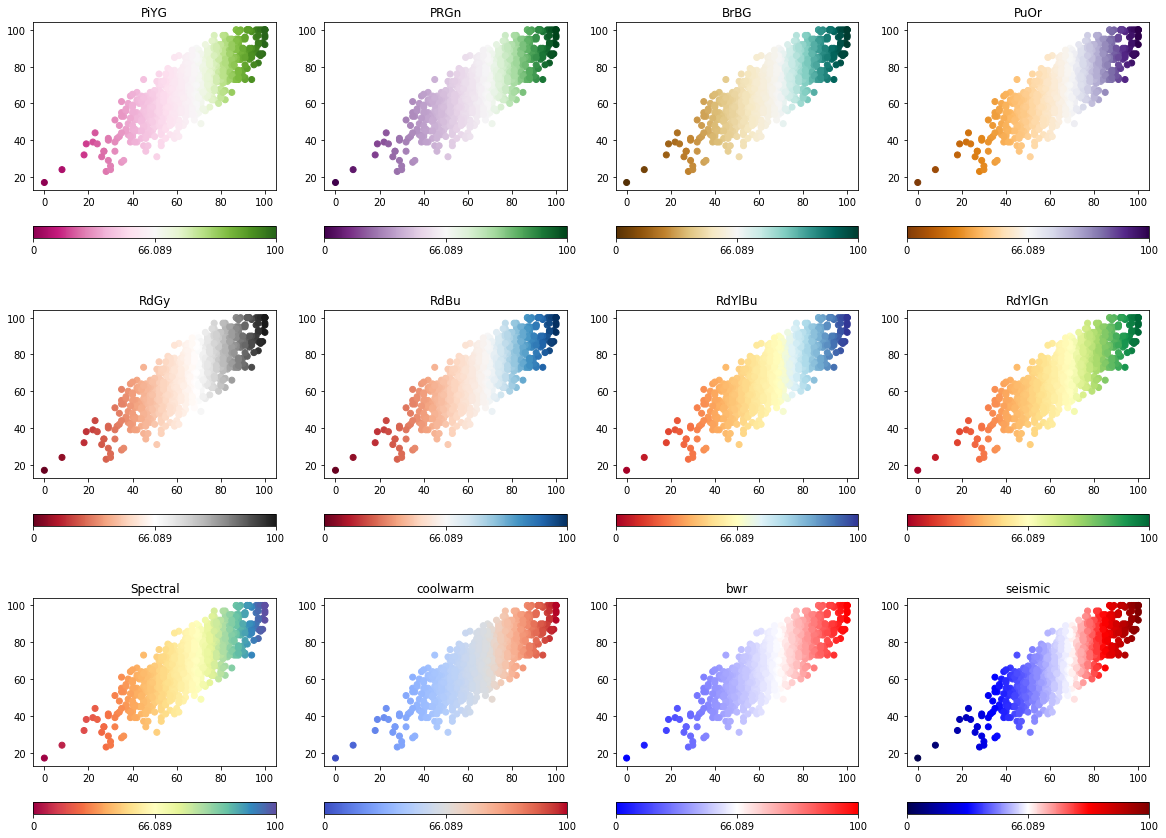

In [36]:
from matplotlib.colors import TwoSlopeNorm

diverging_cm_list = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# vcenter(중간값)을 student['reading score'].mean()으로 설정한다.
offset = TwoSlopeNorm(vmin=0, vcenter=student['reading score'].mean(), vmax=100)

student_sub = student.sample(100)

for idx, cm in enumerate(diverging_cm_list):    
    pcm = axes[idx].scatter(student['math score'], student['reading score'],
                            c=offset(student['math score']), 
                            cmap=cm,
                     )
    cbar = fig.colorbar(pcm, ax=axes[idx], 
                        ticks=[0, 0.5, 1], 
                        orientation='horizontal'
                       )
    cbar.ax.set_xticklabels([0, student['math score'].mean(), 100])
    axes[idx].set_title(cm)
    
plt.show()

## 3. 그 외 색 Tips

#### 3.1. 강조, 색상 대비
데이터에서 다름을 보이기 위해 **Highlighting** 가능

* 강조를 위한 방법 중 하나. **색상 대비(Color Contrast)** 사용
    * 명도, 색상, 채도, 보색 대비 등 존재

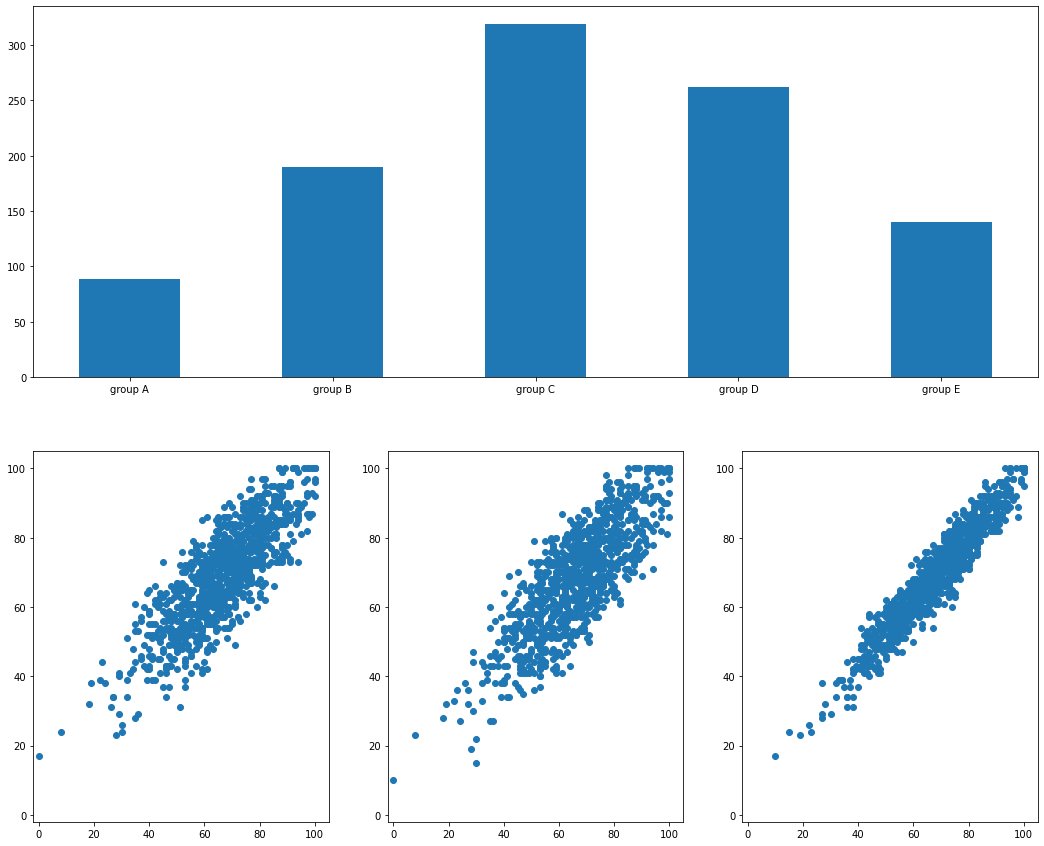

In [37]:
fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'])
ax_s2.scatter(student['math score'], student['writing score'])
ax_s3.scatter(student['writing score'], student['reading score'])

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

#### 3-1-1. 명도 대비

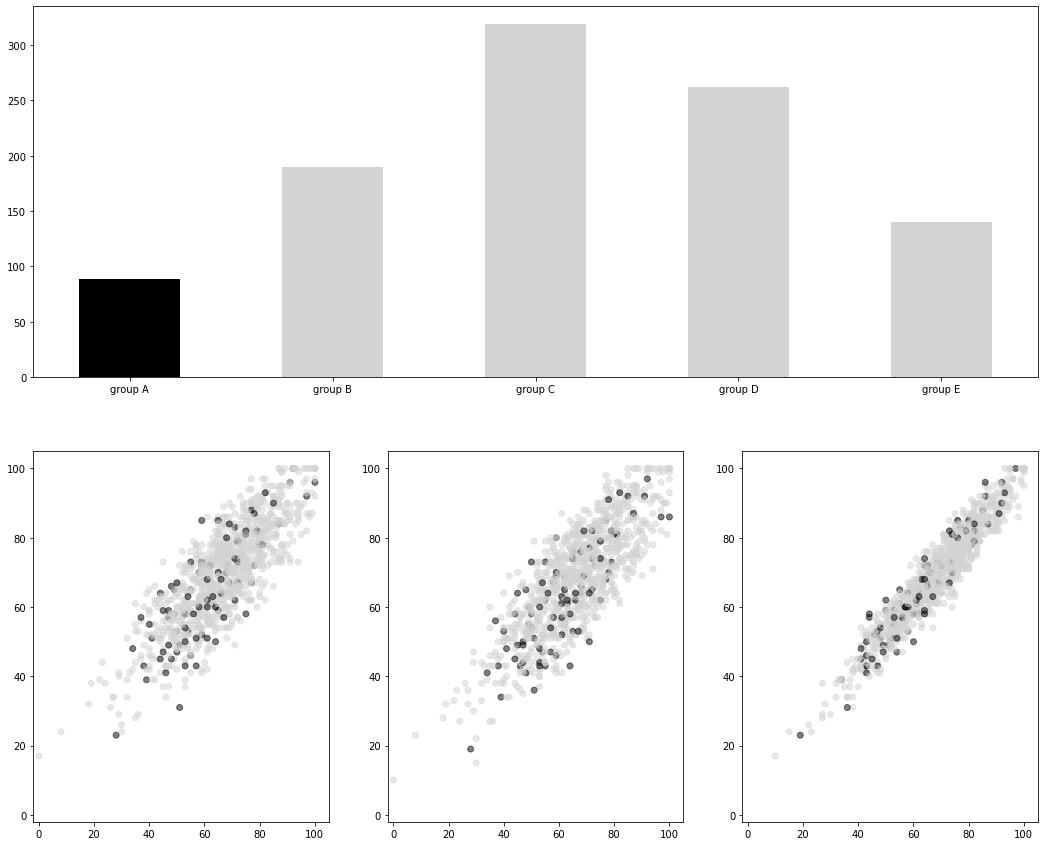

In [38]:
a_color, nota_color = 'black', 'lightgray'

colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.5)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.5)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.5)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

#### 3-1-2. 채도 대비

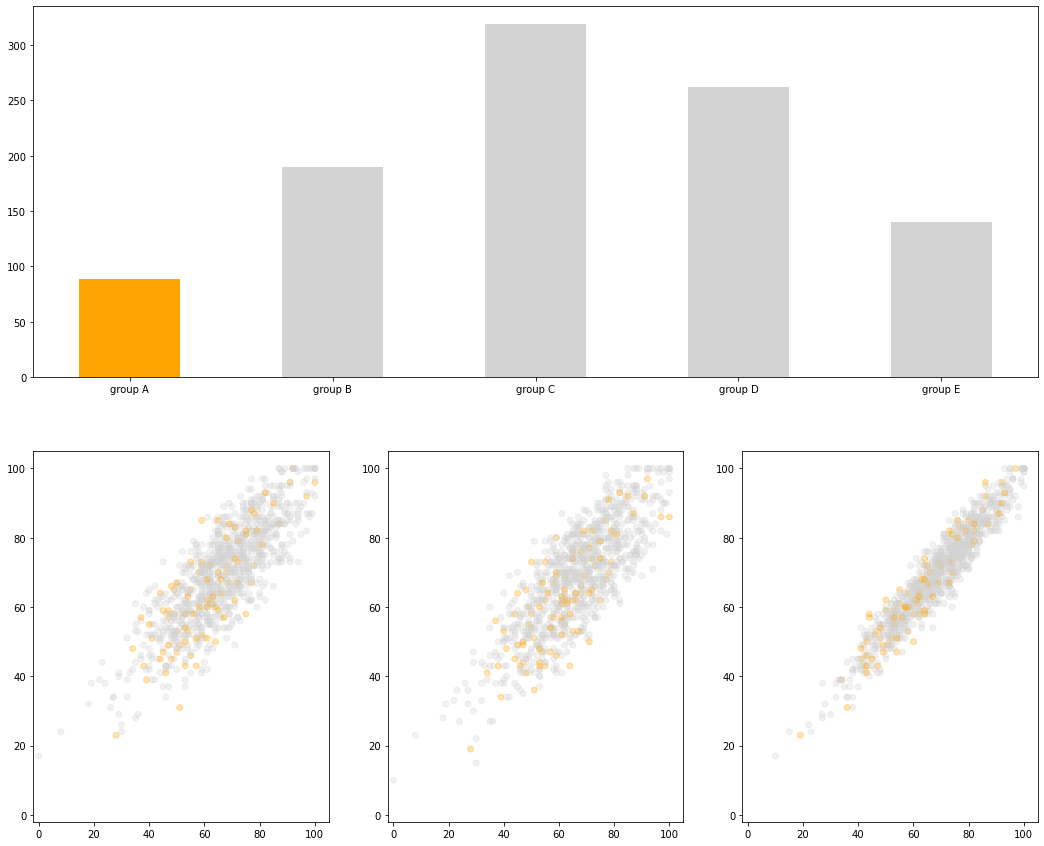

In [41]:
a_color, nota_color = 'orange', 'lightgray'

colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.3)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.3)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.3)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

#### 3-1-3. 보색 대비

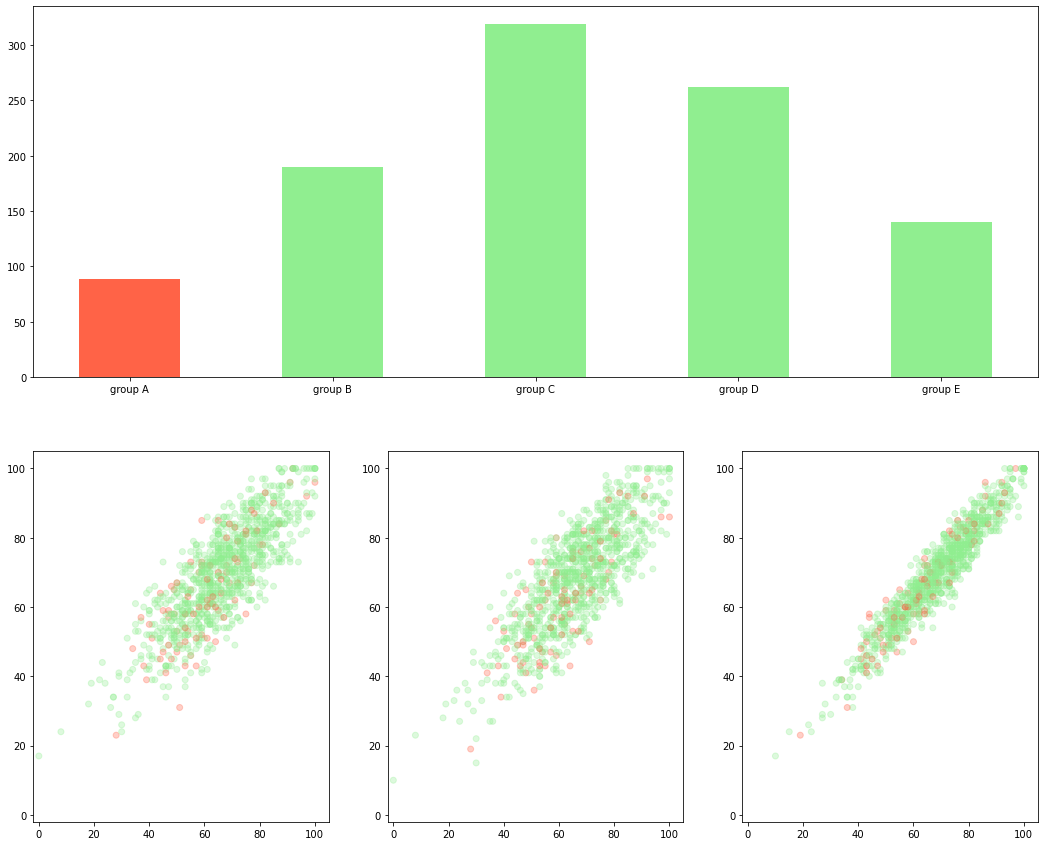

In [42]:
a_color, nota_color = 'tomato', 'lightgreen'

colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.3)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.3)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.3)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

#### 3.2. 색각 이상
* 색맹 : 삼원색 중에 특정 색을 감지 못함
* 색약 : 부분적으로 인지를 못할 경우